<a href="https://colab.research.google.com/github/Santo1337/BigData/blob/main/Sentiment_Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E-commerce Product Review Sentiment analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')




Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/sample30.csv')
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [ ]:
#dropping columns
#df.drop(columns=['categories', 'manufacturer', 'reviews_date'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [ ]:
df.shape

(30000, 15)

## **Data Cleaning**

In [ ]:
from ipykernel import kernelapp as app
import matplotlib.pyplot as plt

# Calculate the percentage of missing values in each column
missing_per = (df.isnull().sum() / len(df)) * 100


In [ ]:
# Sort the columns by percentage of missing values in descending order

miss_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
missing_perc_sorted = missing_per.sort_values(ascending=False)
miss_data = pd.concat([miss_count, missing_perc_sorted ], axis=1, keys=['Percentage','Count'])
miss_data

,Percentage,Count
reviews_userProvince,29830.0,99.433333
reviews_userCity,28071.0,93.570000
reviews_didPurchase,14068.0,46.893333
reviews_doRecommend,2570.0,8.566667
reviews_title,190.0,0.633333
manufacturer,141.0,0.470000
reviews_username,63.0,0.210000
reviews_date,46.0,0.153333
user_sentiment,1.0,0.003333
id,NaN,0.000000


In [ ]:
df.drop(columns=['reviews_userProvince','reviews_userCity','reviews_didPurchase'], inplace=True)

In [ ]:
df.isnull().sum()

id                        0
brand                     0
categories                0
manufacturer            141
name                      0
reviews_date             46
reviews_doRecommend    2570
reviews_rating            0
reviews_text              0
reviews_title           190
reviews_username         63
user_sentiment            1
dtype: int64

In [ ]:
df1=df.dropna()

In [ ]:
df1.isnull().sum()

id                     0
brand                  0
categories             0
manufacturer           0
name                   0
reviews_date           0
reviews_doRecommend    0
reviews_rating         0
reviews_text           0
reviews_title          0
reviews_username       0
user_sentiment         0
dtype: int64

In [ ]:
df1

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,1,Bought this earlier today and was excited to c...,Disappointing,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,1,I bought this product for my husband and I to ...,Not happy at all,kimmie,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,True,5,I got this conditioner with Influenster to try...,Softness!!,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,True,5,"I love it , I received this for review purpose...",I love it,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,True,5,First of all I love the smell of this product....,Hair is so smooth after use,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,ktreed95,Positive


In [ ]:
df1.shape

(27230, 12)

In [ ]:
df2=df1.copy()

In [ ]:
#LIMIT = 15000
#df2 = df2[:LIMIT]

In [ ]:
df2['user_sentiment'].value_counts()

Positive    24319
Negative     2911
Name: user_sentiment, dtype: int64

In [ ]:
df2.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,1,My boyfriend and I bought this to spice things...,Not worth it,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,1,Bought this earlier today and was excited to c...,Disappointing,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,1,I bought this product for my husband and I to ...,Not happy at all,kimmie,Negative


In [ ]:
df3=df2.copy()

# **Data Processing**

In [ ]:
# Mapping the categorical user_sentiment to numerical 1 or 0
df3['user_sentiment'] = df3['user_sentiment'].map({'Positive':1,'Negative':0})

In [ ]:
# combining reviws text and reviwes title and drop these columns
df3['full_reviews'] = df3['reviews_text'] + " " + df3['reviews_title']
df3.drop(columns=['reviews_text', 'reviews_title'], inplace=True)
df3.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,full_reviews
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,rebecca,0,I read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,walker557,0,My husband bought this gel for us. The gel cau...
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,1,samantha,0,My boyfriend and I bought this to spice things...
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,1,raeanne,0,Bought this earlier today and was excited to c...
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,1,kimmie,0,I bought this product for my husband and I to ...


**Dropping unrequired columns**

In [ ]:
df3.drop(columns=['categories', 'manufacturer', 'reviews_date','id','name'], inplace=True)

In [ ]:
df_final = df3[['full_reviews', 'user_sentiment']]
df_final

,full_reviews,user_sentiment
3,I read through the reviews on here before look...,0
4,My husband bought this gel for us. The gel cau...,0
5,My boyfriend and I bought this to spice things...,0
6,Bought this earlier today and was excited to c...,0
7,I bought this product for my husband and I to ...,0
...,...,...
29995,I got this conditioner with Influenster to try...,1
29996,"I love it , I received this for review purpose...",1
29997,First of all I love the smell of this product....,1
29998,I received this through Influenster and will n...,1


In [ ]:
df_final.shape

(27230, 2)

**Lower Casing**

In [ ]:
df_final['full_reviews'] = df_final['full_reviews'].str.lower()  # lowering the case!
df_final.head()

<ipython-input-28-5fcc118ea4e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['full_reviews'] = df_final['full_reviews'].str.lower()  # lowering the case!


,full_reviews,user_sentiment
3,i read through the reviews on here before look...,0
4,my husband bought this gel for us. the gel cau...,0
5,my boyfriend and i bought this to spice things...,0
6,bought this earlier today and was excited to c...,0
7,i bought this product for my husband and i to ...,0


**Remove puntuation**

In [ ]:
df_final['full_reviews'] = df_final['full_reviews'].str.replace('[^\w\s]', '')
df_final

<ipython-input-29-ecd98e5cea43>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final['full_reviews'] = df_final['full_reviews'].str.replace('[^\w\s]', '')
<ipython-input-29-ecd98e5cea43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['full_reviews'] = df_final['full_reviews'].str.replace('[^\w\s]', '')


,full_reviews,user_sentiment
3,i read through the reviews on here before look...,0
4,my husband bought this gel for us the gel caus...,0
5,my boyfriend and i bought this to spice things...,0
6,bought this earlier today and was excited to c...,0
7,i bought this product for my husband and i to ...,0
...,...,...
29995,i got this conditioner with influenster to try...,1
29996,i love it i received this for review purposes...,1
29997,first of all i love the smell of this product ...,1
29998,i received this through influenster and will n...,1


**Remove number**

In [ ]:
df_final['full_reviews'] = df_final['full_reviews'].str.replace('\d', '')
df_final

<ipython-input-30-078de1f10c40>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final['full_reviews'] = df_final['full_reviews'].str.replace('\d', '')
<ipython-input-30-078de1f10c40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['full_reviews'] = df_final['full_reviews'].str.replace('\d', '')


,full_reviews,user_sentiment
3,i read through the reviews on here before look...,0
4,my husband bought this gel for us the gel caus...,0
5,my boyfriend and i bought this to spice things...,0
6,bought this earlier today and was excited to c...,0
7,i bought this product for my husband and i to ...,0
...,...,...
29995,i got this conditioner with influenster to try...,1
29996,i love it i received this for review purposes...,1
29997,first of all i love the smell of this product ...,1
29998,i received this through influenster and will n...,1


** Remove url and tags! **

In [ ]:
import re
df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))

df_final.head()

<ipython-input-31-6efce6fc45cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))


,full_reviews,user_sentiment
3,i read through the reviews on here before look...,0
4,my husband bought this gel for us the gel caus...,0
5,my boyfriend and i bought this to spice things...,0
6,bought this earlier today and was excited to c...,0
7,i bought this product for my husband and i to ...,0


***Remove html tags***

In [ ]:
from bs4 import BeautifulSoup
df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

df_final

<ipython-input-32-97b75d833c16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())


,full_reviews,user_sentiment
3,i read through the reviews on here before look...,0
4,my husband bought this gel for us the gel caus...,0
5,my boyfriend and i bought this to spice things...,0
6,bought this earlier today and was excited to c...,0
7,i bought this product for my husband and i to ...,0
...,...,...
29995,i got this conditioner with influenster to try...,1
29996,i love it i received this for review purposes...,1
29997,first of all i love the smell of this product ...,1
29998,i received this through influenster and will n...,1


**Remove emails**

In [ ]:
df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))  # it will remove te emails
df_final.head()

<ipython-input-33-d40847326ae7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))  # it will remove te emails


,full_reviews,user_sentiment
3,i read through the reviews on here before look...,0
4,my husband bought this gel for us the gel caus...,0
5,my boyfriend and i bought this to spice things...,0
6,bought this earlier today and was excited to c...,0
7,i bought this product for my husband and i to ...,0


**Remove extra spaces**

In [ ]:
df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: " ".join(x.split()))
df_final

<ipython-input-34-f3eddd94eb10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: " ".join(x.split()))


,full_reviews,user_sentiment
3,i read through the reviews on here before look...,0
4,my husband bought this gel for us the gel caus...,0
5,my boyfriend and i bought this to spice things...,0
6,bought this earlier today and was excited to c...,0
7,i bought this product for my husband and i to ...,0
...,...,...
29995,i got this conditioner with influenster to try...,1
29996,i love it i received this for review purposes ...,1
29997,first of all i love the smell of this product ...,1
29998,i received this through influenster and will n...,1


**Removing Accented Character**

In [ ]:
import unicodedata

def remove_accented_chars(x):
    x =  unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

x = "â, î or ô"
remove_accented_chars(x)

'a, i or o'

In [ ]:
# It will remove the accented characters
df_final['full_reviews'] = df_final['full_reviews'].apply(remove_accented_chars)
df_final.head()

<ipython-input-36-88371b53b126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['full_reviews'] = df_final['full_reviews'].apply(remove_accented_chars)


,full_reviews,user_sentiment
3,i read through the reviews on here before look...,0
4,my husband bought this gel for us the gel caus...,0
5,my boyfriend and i bought this to spice things...,0
6,bought this earlier today and was excited to c...,0
7,i bought this product for my husband and i to ...,0


**Convert words to lemma**

In [ ]:
import spacy
# Load the installed model "en_core_web_sm"
nlp = spacy.load("en_core_web_sm")

In [ ]:
x = "husband bought gel us gel caused irritation felt like burning skin wouldnt recommend gel irritation"

def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)

    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

a = make_to_base(x)
print('Before:', x)
print('After:', a)

Before: husband bought gel us gel caused irritation felt like burning skin wouldnt recommend gel irritation
After: husband buy gel us gel cause irritation feel like burn skin would not recommend gel irritation


In [ ]:
# Let's convert the data
%%time
df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: make_to_base(x))
df_final.head()

CPU times: user 5min 31s, sys: 922 ms, total: 5min 32s
Wall time: 5min 37s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,full_reviews,user_sentiment
3,I read through the review on here before look ...,0
4,my husband buy this gel for we the gel cause i...,0
5,my boyfriend and I buy this to spice thing up ...,0
6,buy this early today and was excited to check ...,0
7,I buy this product for my husband and I to try...,0


**Correcting Componded Words**

In [ ]:
!pip install symspellpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for editdistpy: filename=editdistpy-0.1.3-cp310-cp310-linux_x86_64.whl size=141745 sha256=4778b41ff8cd30c590bd83257b031a9f2f75caabb9f38d181caf78e94efafe6c
  Stored in directory: /root/.cache/pip/wheels/88/6a/a6/a1283cc145323a1fb3d475bd158ee60b248ab1985230d266fc
Successfully built editdistpy


In [ ]:
import pkg_resources
from symspellpy import SymSpell, Verbosity

In [ ]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

True

In [ ]:
bigram_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_bigramdictionary_en_243_342.txt"
)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

True

In [ ]:
def correct_spelling_symspell_compound(text):
    words = [
        sym_spell.lookup_compound(
            word,
            max_edit_distance=2
            )[0].term
        for word in text.split()]
    text = " ".join(words)
    return text

In [ ]:
text = "my husband buythis gel , the gel cause irritation and it feel like it was burn myskin I would not recommend this gel irritation"
correct_spelling_symspell_compound(text)

'my husband buy this gel  the gel cause irritation and it feel like it was burn my skin i would not recommend this gel irritation'

In [ ]:
df_final["full_reviews"] = df_final["full_reviews"].apply(correct_spelling_symspell_compound)


<ipython-input-46-161a2f482c5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["full_reviews"] = df_final["full_reviews"].apply(correct_spelling_symspell_compound)


In [ ]:
df_final

,full_reviews,user_sentiment
3,i read through the review on here before look ...,0
4,my husband buy this gel for we the gel cause i...,0
5,my boyfriend and i buy this to spice thing up ...,0
6,buy this early today and was excited to check ...,0
7,i buy this product for my husband and i to try...,0
...,...,...
29995,i get this conditioner with in muenster to try...,1
29996,i love it i receive this for review purpose fr...,1
29997,first of all i love the smell of this product ...,1
29998,i receive this through in muenster and will ne...,1


**Remove Stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# importing Nltk stopword package
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Loading Stopwords into a list
NLTK_stop_words_list=stopwords.words('english')
print(NLTK_stop_words_list)
print("Total numbers of stop words are ")
print(len(NLTK_stop_words_list))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sw =NLTK_stop_words_list
df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df_final.head()

<ipython-input-51-d2baf1e13711>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['full_reviews'] = df_final['full_reviews'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))


,full_reviews,user_sentiment
3,read review look buy one couple lubricant ulti...,0
4,husband buy gel gel cause irritation feel like...,0
5,boyfriend buy spice thing bedroom highly disap...,0
6,buy early today excited check base product des...,0
7,buy product husband try impressed tingling war...,0


In [ ]:
df4=df_final.copy()
df5=df_final.copy()
df6=df_final.copy()

In [ ]:
df4.shape

(27230, 2)

# **Visualization**

In [ ]:
import plotly.express as px

In [ ]:
df2.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_doRecommend', 'reviews_rating', 'reviews_text',
       'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
fig = px.histogram(df2, x="user_sentiment",color_discrete_sequence =['orange']*len(df2),height=400)
fig.show()

<Axes: xlabel='reviews_rating', ylabel='user_sentiment'>

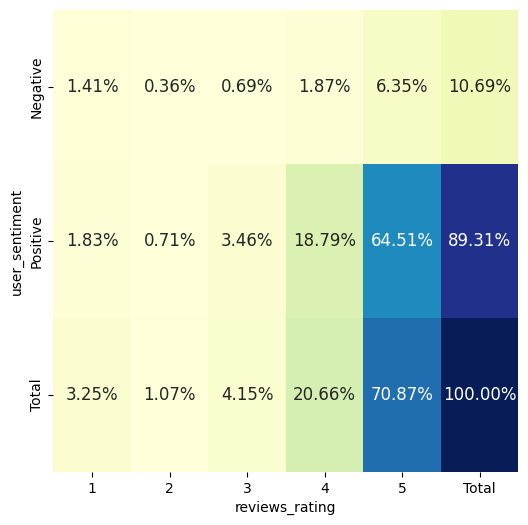

In [ ]:
plt.subplots(figsize=(6,6))
sns.set(font_scale=1)
sns.heatmap(pd.crosstab(index=df1['user_sentiment'],
                    columns=df1['reviews_rating'],
                     normalize='all',margins=True, margins_name="Total"),
            cmap="YlGnBu", annot=True, cbar=False,fmt=".2%")

In [ ]:
#  top 10 brands among the positive sentiments
hm= df3[df3['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10]

hm


brand
Clorox                  9540
Warner Home Video       3033
Disney                  1106
L'oreal Paris           1004
FOX                      759
Burt's Bees              691
Sony Pictures            686
Universal Home Video     641
Summit Entertainment     635
Olay                     548
Name: brand, dtype: int64

In [ ]:
fig=px.bar(hm,color_discrete_sequence = ['green'], title = "Top 10 Positive Reviewed Brand")
fig.show()

In [ ]:
#  top 10 brands among the negative sentiments
hn= df3[df3['user_sentiment']==0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10]

hn


brand
Clorox               964
Warner Home Video    291
Nexxus               178
Sony Pictures        158
FOX                  128
Burt's Bees          103
Disney                84
Windex                69
Olay                  67
Pendaflex             60
Name: brand, dtype: int64

In [ ]:
fig=px.bar(hn,color_discrete_sequence = ['red'], title = "Top 10 Negative Reviewed Brand")
fig.show()

In [ ]:
#  top 10 users with 'positive user sentiment'
hk= df3[df3['user_sentiment']==1].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10]

hk


reviews_username
mike          36
chris         26
jojo          13
tony          13
movielover    12
james         12
sandy         12
rick          12
john          11
lisa          10
Name: reviews_username, dtype: int64

In [ ]:
fig=px.bar(hk,color_discrete_sequence = ['green'], title = "Top 10 Users with Positive Sentiment")
fig.show()

In [ ]:
#  top 10 users with 'negative user sentiment'
hl= df3[df3['user_sentiment']==0].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10]

hl


reviews_username
mary            5
aj1135          4
chris           4
brian           4
steve           4
wendy           3
keith           3
sandy           3
sallysue0827    3
melcsi          3
Name: reviews_username, dtype: int64

In [ ]:
fig=px.bar(hl,color_discrete_sequence = ['red'], title = "Top 10 Users with Negative Sentiment")
fig.show()

In [ ]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# This is a helper function to map NTLK position tags
#def get_wordnet_pos(tag):
   # if tag.startswith('J'):
       # return wordnet.ADJ
   # elif tag.startswith('V'):
       # return wordnet.VERB
    #elif tag.startswith('N'):
       # return wordnet.NOUN
   # elif tag.startswith('R'):
       # return wordnet.ADV
    #else:
       # return wordnet.NOUN

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

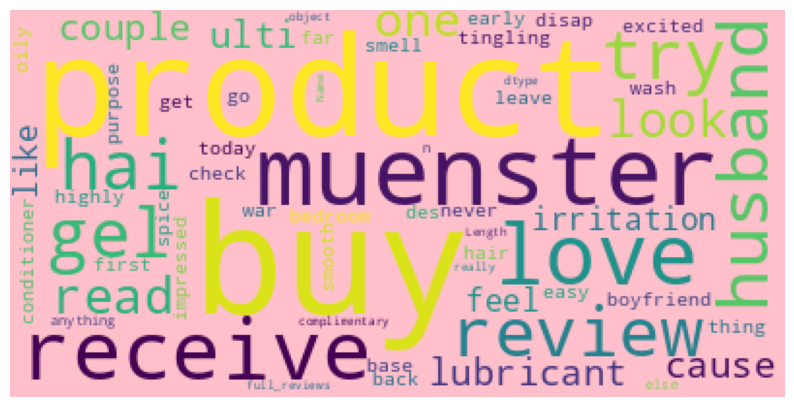

In [ ]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words,max_words=100,background_color ='pink').generate(str(df4.full_reviews))

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [ ]:
countriesDummies = df5['full_reviews'].str.get_dummies(sep=",")

countriesCount = countriesDummies.sum()
countriesCount = countriesCount.reset_index().rename(columns = {"index": "Frequent_features", 0:"Number of Sentence"})
countriesCount['Frequent_features'] = countriesCount['Frequent_features'].str.strip()

countriesCount.loc[countriesCount['Frequent_features'].str.strip() == "United States", 'Frequent_features'] = "United States of America"
countriesCount = countriesCount.groupby("Frequent_features").sum().reset_index().sort_values(by = "Number of Sentence", ascending = False)
countriesCount = countriesCount[countriesCount.Frequent_features != 'nan']


fig = px.bar(countriesCount.head(10),
             x='Frequent_features',
             y='Number of Sentence',
             #log_y = True,
             color_discrete_sequence = ['crimson'],height=2200,
             title = "Top 10 Most Frequent Features")

fig.update_layout({"plot_bgcolor":"white"},
                  font = {"color": "black"}
                 )
fig.show()

In [ ]:
from collections import Counter

In [ ]:
df6['temp_list'] = df6['full_reviews'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df6['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,great,14123
1,love,12278
2,use,12253
3,product,11368
4,movie,10714
5,review,8855
6,part,8657
7,good,8573
8,wipe,8388
9,collect,8302


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Top 10 Commmon Words in Review', orientation='h',template = 'plotly_dark',  color_discrete_sequence= px.colors.sequential.Plasma_r, text_auto=True,
             width=800, height=500,color='Common_words')
fig.show()

In [ ]:
fig = px.pie(temp, values='count', names='Common_words', title='Top 10 Words Precentage')
fig.show()

In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',color_discrete_sequence=['#D81E1F','#0D3383'],title='Tree of Most Top 10 Common Words')
fig.show()

In [ ]:
#spliting dataframe to into postive and negative based on the review nature
positive = df6[df6['user_sentiment'] > 0]

negative = df6[df6['user_sentiment'] <= 0]

In [ ]:
#MosT common positive words
top = Counter([item for sublist in positive['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,great,13606
1,love,11736
2,use,10933
3,product,10308
4,movie,9916
5,good,8195
6,review,8035
7,part,7864
8,wipe,7674
9,clean,7597


In [ ]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Top 10 Positive Words', orientation='h',template = 'plotly_dark',text_auto=True, color_discrete_sequence= px.colors.sequential.Plasma_r,
             width=800, height=500,color='Common_words')
fig.show()

In [ ]:
fig = px.pie(temp_positive, values='count', names='Common_words', title='Top 10 Words Precentage')
fig.show()

In [ ]:
fig = px.treemap(temp_positive, path=['Common_words'], values='count',color_discrete_sequence=['#D81E1F','#0D3383'],title='Tree Of Most Top 10 Common Positive Words')
fig.show()

In [ ]:
#MosT common negative words
top = Counter([item for sublist in negative['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(10))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,product,1060
2,review,820
3,movie,798
4,part,793
5,collect,761
6,promotion,760
7,wipe,714
8,like,594
9,clorox,575


In [ ]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Top 10 Negetive Words', orientation='h', template = 'plotly_dark',text_auto=True, color_discrete_sequence= px.colors.sequential.Plasma_r,
             width=800, height=500,color='Common_words')
fig.show()

In [ ]:
fig = px.pie(temp_negative, values='count', names='Common_words',color_discrete_map={0:'#0D3383',1:'#D81E1F'}, title='Top 10 Negetive Words Precentage')
fig.show()

In [ ]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',color_discrete_sequence=['#D81E1F','#0D3383'],title='Tree Of Most Common Top 10 Negative Words')
fig.show()

# **ML model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
df7=df_final.copy()

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27230 entries, 3 to 29999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   full_reviews    27230 non-null  object
 1   user_sentiment  27230 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 638.2+ KB


In [ ]:
df7.shape

(27230, 2)

In [ ]:
#split the dataset

#train dataset by splitting the data
train_reviews = df7.full_reviews [:19060]
train_sentiments = df7.user_sentiment[:19060]

#test dataset
test_reviews = df7.full_reviews [19060:]
test_sentiments = df7.user_sentiment[19060:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(19060,) (19060,)
(8170,) (8170,)


In [ ]:
#Count vectorizer for Bag of Words

cv=CountVectorizer()

#Transformed Train Reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#Transformed Test Reviews
cv_test_reviews=cv.transform(test_reviews)

print('cv_train:',cv_train_reviews.shape)
print('cv_test:',cv_test_reviews.shape)

cv_train: (19060, 8110)
cv_test: (8170, 8110)


In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer()

#transformed train reviews
tv_train_reviews=tv.fit_transform(train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (19060, 8110)
Tfidf_test: (8170, 8110)


In [ ]:
############################################
###                  SVM                 ###
############################################
#linear SVM
SVM = SVC(kernel='linear')

#Fitting the model for CV
SVM_bow = SVM.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf
SVM_tfidf = SVM.fit(tv_train_reviews,train_sentiments)

#Predicting the model for cv
SVM_bow_predict = SVM.predict(cv_test_reviews)

#Predicting the model for tfidf
SVM_tfidf_predict = SVM.predict(tv_test_reviews)

#Accuracy score for cv
SVM_bow_score=accuracy_score(test_sentiments,SVM_bow_predict)
print("SVM CV accuracy :",SVM_bow_score)

#Accuracy score for tfidf
SVM_tfidf_score=accuracy_score(test_sentiments,SVM_tfidf_predict)
print("SVM TFIDF accuracy :",SVM_tfidf_score)


SVM CV accuracy : 0.9133414932680538
SVM TFIDF accuracy : 0.912484700122399


In [ ]:
#Classification report for cv
SVM_CV_report=classification_report(test_sentiments,SVM_bow_predict,target_names=['Negative','Positive'])
print(confusion_matrix(test_sentiments,SVM_bow_predict), '\n')
print(SVM_CV_report)

#Classification report for tfidf
SVM_tfidf_report=classification_report(test_sentiments,SVM_tfidf_predict,target_names=['Negative','Positive'])
print(confusion_matrix(test_sentiments,SVM_tfidf_predict), '\n')
print(SVM_tfidf_report)

[[ 195  658]
 [  50 7267]] 

              precision    recall  f1-score   support

    Negative       0.80      0.23      0.36       853
    Positive       0.92      0.99      0.95      7317

    accuracy                           0.91      8170
   macro avg       0.86      0.61      0.65      8170
weighted avg       0.90      0.91      0.89      8170

[[ 228  625]
 [  90 7227]] 

              precision    recall  f1-score   support

    Negative       0.72      0.27      0.39       853
    Positive       0.92      0.99      0.95      7317

    accuracy                           0.91      8170
   macro avg       0.82      0.63      0.67      8170
weighted avg       0.90      0.91      0.89      8170



In [ ]:
from matplotlib import style
style.use('ggplot')

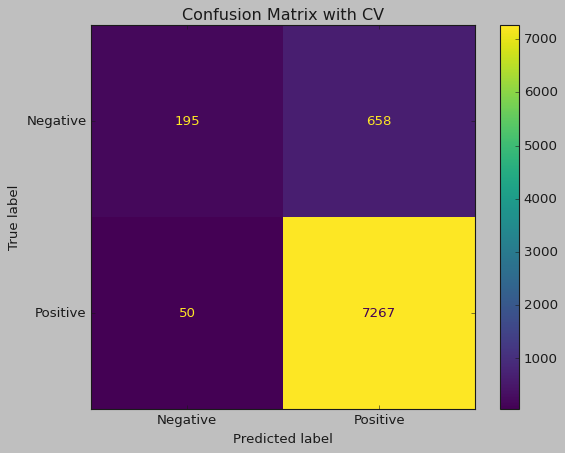

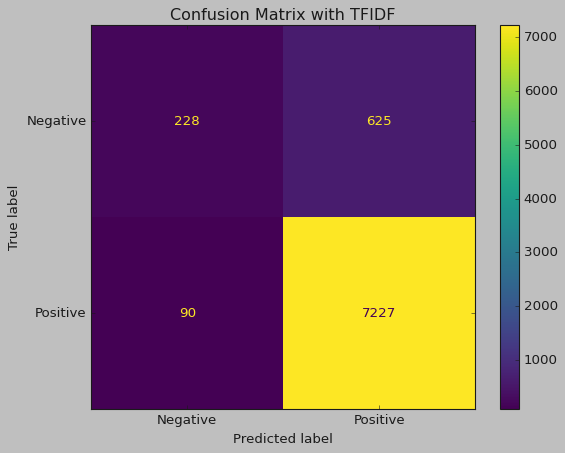

In [ ]:

style.use('classic')
Conf_mat =(confusion_matrix(test_sentiments,SVM_bow_predict))
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["Negative","Positive"])
disp.plot()
plt.title("Confusion Matrix with CV")
plt.show()

Conf_mat =(confusion_matrix(test_sentiments,SVM_tfidf_predict))
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["Negative","Positive"])
disp.plot()
plt.title("Confusion Matrix with TFIDF")
plt.show()

roc_auc_score for SVM CV:  0.6108857610655043


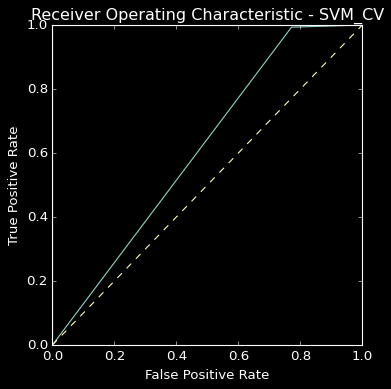

roc_auc_score for SVM_TIDF:  0.6274958939507331


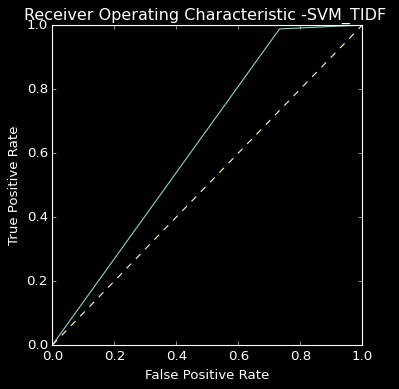

In [ ]:
# AUC score and ROC curve
plt.style.use('dark_background')
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, SVM_bow_predict)
print('roc_auc_score for SVM CV: ', roc_auc_score(test_sentiments, SVM_bow_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - SVM_CV')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, SVM_tfidf_predict)
print('roc_auc_score for SVM_TIDF: ', roc_auc_score(test_sentiments, SVM_tfidf_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic -SVM_TIDF ')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
###Random Forest

#training the model
DT1=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

#Fitting the model for CV
DT1_bow=DT1.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf
DT1_tfidf=DT1.fit(tv_train_reviews,train_sentiments)

#Predicting the model for CV
DT1_bow_predict=DT1.predict(cv_test_reviews)

##Predicting the model for tfidf
DT1_tfidf_predict=DT1.predict(tv_test_reviews)

#Accuracy score for CV
DT1_bow_score=accuracy_score(test_sentiments,DT1_bow_predict)
print("RF CV accuracy :",DT1_bow_score)

#Accuracy score for tfidf
DT1_tfidf_score=accuracy_score(test_sentiments,DT1_tfidf_predict)
print("RF TFIDF accuracy :",DT1_tfidf_score)

RF CV accuracy : 0.9018359853121175
RF TFIDF accuracy : 0.9


In [ ]:
#Classification report for bag of words
DT1_bow_report=classification_report(test_sentiments,DT1_bow_predict,target_names=["Negative","Positive"])
print(confusion_matrix(test_sentiments,DT1_bow_predict), '\n')
print(DT1_bow_report)

#Classification report for tfidf features
DT1_tfidf_report=classification_report(test_sentiments,DT1_tfidf_predict,target_names=["Negative","Positive"])
print(confusion_matrix(test_sentiments,DT1_tfidf_predict), '\n')
print(DT1_tfidf_report)

[[ 129  724]
 [  78 7239]] 

              precision    recall  f1-score   support

    Negative       0.62      0.15      0.24       853
    Positive       0.91      0.99      0.95      7317

    accuracy                           0.90      8170
   macro avg       0.77      0.57      0.60      8170
weighted avg       0.88      0.90      0.87      8170

[[  53  800]
 [  17 7300]] 

              precision    recall  f1-score   support

    Negative       0.76      0.06      0.11       853
    Positive       0.90      1.00      0.95      7317

    accuracy                           0.90      8170
   macro avg       0.83      0.53      0.53      8170
weighted avg       0.89      0.90      0.86      8170



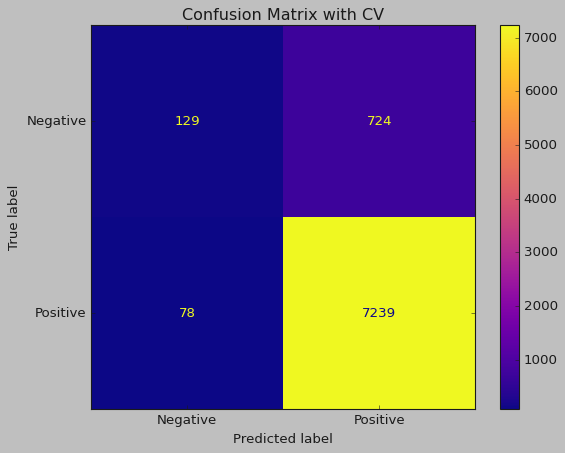

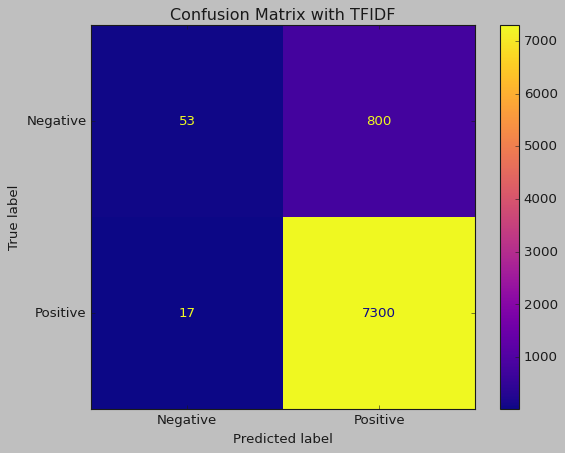

In [ ]:
style.use('classic')
Conf_mat =(confusion_matrix(test_sentiments,DT1_bow_predict))
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["Negative","Positive"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix with CV")
plt.show()

style.use('classic')
Conf_mat =(confusion_matrix(test_sentiments,DT1_tfidf_predict))
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["Negative","Positive"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix with TFIDF")
plt.show()


roc_auc_score for RF_CV:  0.5702854214943087


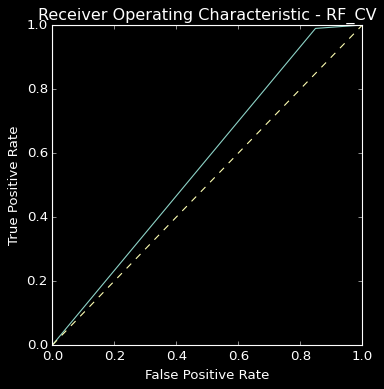

roc_auc_score for RF_TFIDF:  0.5299051446942762


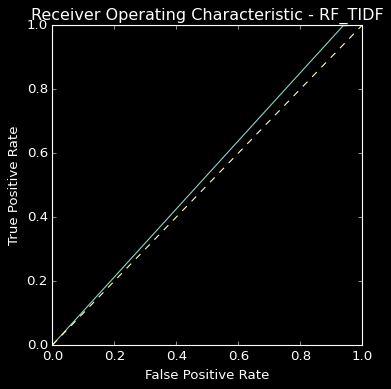

In [ ]:
# AUC score and ROC curve
plt.style.use('dark_background')
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, DT1_bow_predict)
print('roc_auc_score for RF_CV: ', roc_auc_score(test_sentiments,DT1_bow_predict))
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - RF_CV')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments,DT1_tfidf_predict)
print('roc_auc_score for RF_TFIDF: ', roc_auc_score(test_sentiments, DT1_tfidf_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - RF_TIDF')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
#Naive Bayes


NB = MultinomialNB()

#Fitting the model for Bag of words
NB_bow = NB.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
NB_tfidf = NB.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
NB_bow_predict = NB.predict(cv_test_reviews)

#Predicting the model for tfidf features
NB_tfidf_predict = NB.predict(tv_test_reviews)

#Accuracy score for bag of words
NB_bow_score=accuracy_score(test_sentiments,NB_bow_predict)
print("NB CV accuracy :",NB_bow_score)

#Accuracy score for tfidf features
NB_tfidf_score=accuracy_score(test_sentiments,NB_tfidf_predict)
print("NB TFIDF accuracy :",NB_tfidf_score)

#Classification report for bag of words
NB_bow_report=classification_report(test_sentiments,NB_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_bow_predict), '\n')
print(NB_bow_report)

#Classification report for tfidf features
NB_tfidf_report=classification_report(test_sentiments,NB_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_tfidf_predict), '\n')
print(NB_tfidf_report)

NB CV accuracy : 0.897062423500612
NB TFIDF accuracy : 0.8951040391676867
[[  56  797]
 [  44 7273]] 

              precision    recall  f1-score   support

    Positive       0.56      0.07      0.12       853
    Negative       0.90      0.99      0.95      7317

    accuracy                           0.90      8170
   macro avg       0.73      0.53      0.53      8170
weighted avg       0.87      0.90      0.86      8170

[[   3  850]
 [   7 7310]] 

              precision    recall  f1-score   support

    Positive       0.30      0.00      0.01       853
    Negative       0.90      1.00      0.94      7317

    accuracy                           0.90      8170
   macro avg       0.60      0.50      0.48      8170
weighted avg       0.83      0.90      0.85      8170



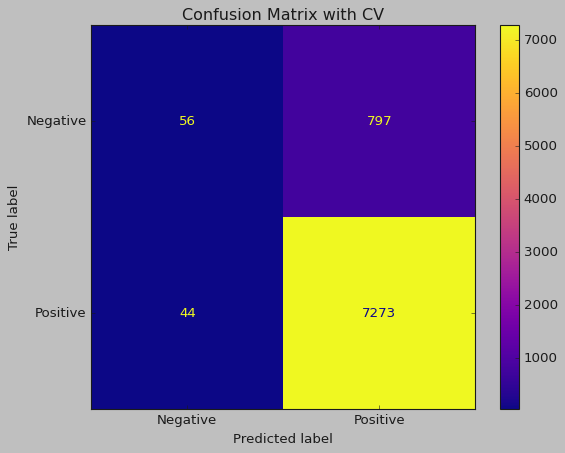

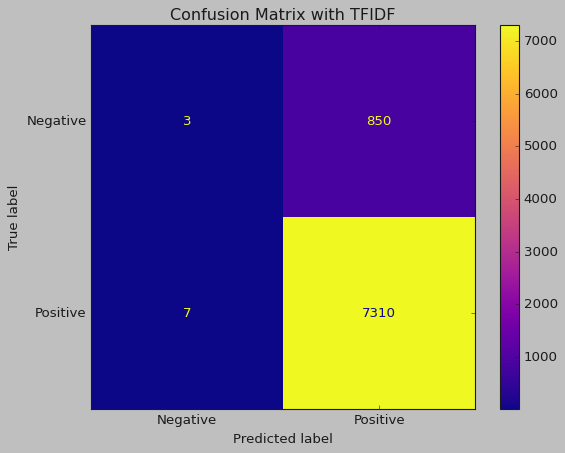

In [ ]:
style.use('classic')
Conf_mat =(confusion_matrix(test_sentiments,NB_bow_predict))
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["Negative","Positive"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix with CV")
plt.show()

Conf_mat =(confusion_matrix(test_sentiments,NB_tfidf_predict))
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["Negative","Positive"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix with TFIDF")
plt.show()

roc_auc_score for NB_CV:  0.5298186256579253


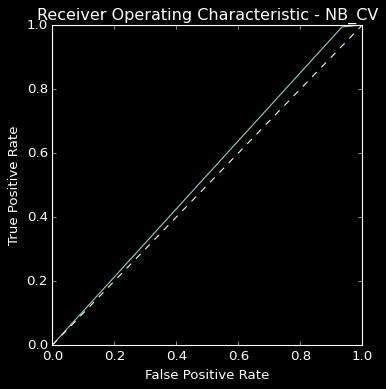

roc_auc_score for NB_TFIDF:  0.501280161297119


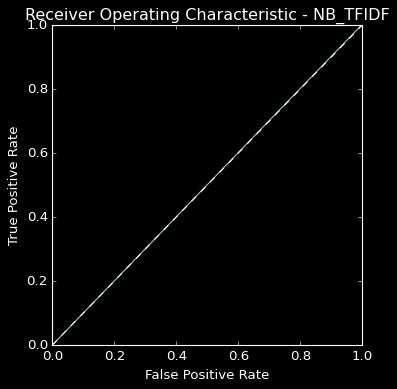

In [ ]:

# AUC score and ROC curve
plt.style.use('dark_background')
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, NB_bow_predict)
print('roc_auc_score for NB_CV: ', roc_auc_score(test_sentiments,NB_bow_predict))
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - NB_CV')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




# AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments,NB_tfidf_predict)
print('roc_auc_score for NB_TFIDF: ', roc_auc_score(test_sentiments, NB_tfidf_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - NB_TFIDF')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
############################################
###           Decision Tree              ###
############################################
#training the model
DT=DecisionTreeClassifier(criterion ='entropy', random_state= 0)

#Fitting the model for Bag of words
DT_bow=DT.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
DT_tfidf=DT.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
DT_bow_predict=DT.predict(cv_test_reviews)

##Predicting the model for tfidf features
DT_tfidf_predict=DT.predict(tv_test_reviews)

#Accuracy score for bag of words
DT_bow_score=accuracy_score(test_sentiments,DT_bow_predict)
print("DT CV accuracy :",DT_bow_score)

#Accuracy score for tfidf features
DT_tfidf_score=accuracy_score(test_sentiments,DT_tfidf_predict)
print("DT TFIDF accuracy :",DT_tfidf_score)

#Classification report for bag of words
DT_bow_report=classification_report(test_sentiments,DT_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,DT_bow_predict), '\n')
print(DT_bow_report)

#Classification report for tfidf features
DT_tfidf_report=classification_report(test_sentiments,DT_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,DT_tfidf_predict), '\n')
print(DT_tfidf_report)



DT CV accuracy : 0.7567931456548348
DT TFIDF accuracy : 0.8664626682986536
[[ 295  558]
 [1429 5888]] 

              precision    recall  f1-score   support

    Positive       0.17      0.35      0.23       853
    Negative       0.91      0.80      0.86      7317

    accuracy                           0.76      8170
   macro avg       0.54      0.58      0.54      8170
weighted avg       0.84      0.76      0.79      8170

[[ 242  611]
 [ 480 6837]] 

              precision    recall  f1-score   support

    Positive       0.34      0.28      0.31       853
    Negative       0.92      0.93      0.93      7317

    accuracy                           0.87      8170
   macro avg       0.63      0.61      0.62      8170
weighted avg       0.86      0.87      0.86      8170



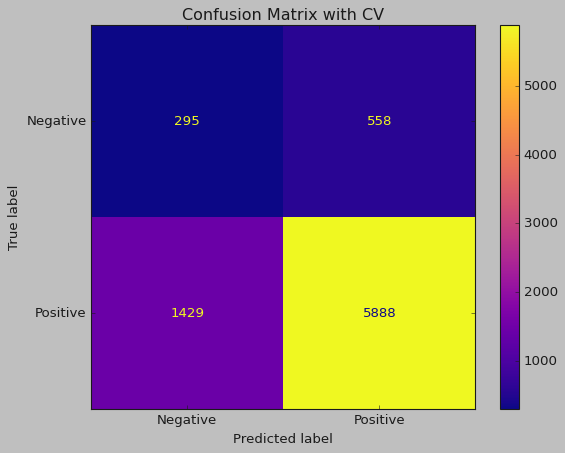

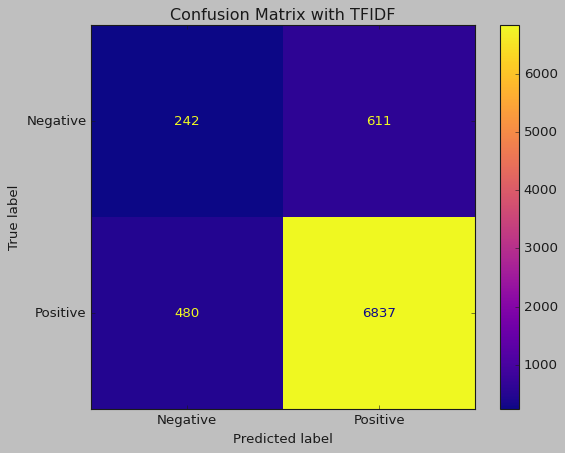

In [ ]:
style.use('classic')
Conf_mat =(confusion_matrix(test_sentiments,DT_bow_predict))
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["Negative","Positive"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix with CV")
plt.show()

Conf_mat =(confusion_matrix(test_sentiments,DT_tfidf_predict))
disp = ConfusionMatrixDisplay(Conf_mat, display_labels=["Negative","Positive"])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix with TFIDF")
plt.show()

roc_auc_score for DT_CV:  0.575269799200532


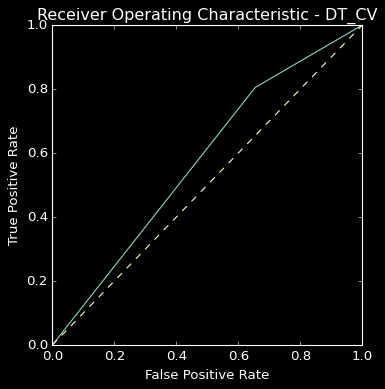

roc_auc_score for DT_TFIDF:  0.6090519580459579


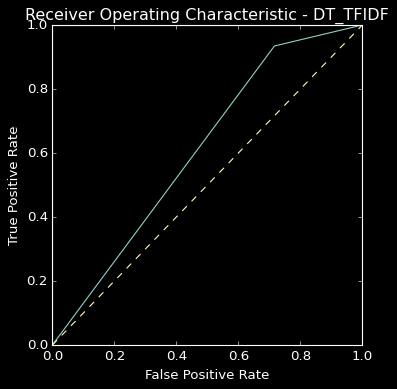

In [ ]:
# AUC score and ROC curve
plt.style.use('dark_background')
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, DT_bow_predict)
print('roc_auc_score for DT_CV: ', roc_auc_score(test_sentiments,DT_bow_predict))
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - DT_CV')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments,DT_tfidf_predict)
print('roc_auc_score for DT_TFIDF: ', roc_auc_score(test_sentiments, DT_tfidf_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - DT_TFIDF')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
from keras.utils import pad_sequences

max_features = 10000
maxlen = 500
batch_size = 32

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_reviews))
train_X = tokenizer.texts_to_sequences(train_reviews)
test_X = tokenizer.texts_to_sequences(test_reviews)

train_X = pad_sequences(train_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

In [ ]:
from keras.layers import Embedding, SimpleRNN, Dense

#Define model
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

#Train the model
model.fit(train_X,train_sentiments,
          epochs=15,
          batch_size=128,
          validation_split=0.2)

loss, RNNaccuracy = model.evaluate(test_X, test_sentiments)

Epoch 1/15
120/120 [==============================] - 23s 172ms/step - loss: 0.3677 - acc: 0.8749 - val_loss: 0.3245 - val_acc: 0.9006
Epoch 2/15
120/120 [==============================] - 20s 171ms/step - loss: 0.3089 - acc: 0.8924 - val_loss: 0.3034 - val_acc: 0.8993
Epoch 3/15
120/120 [==============================] - 21s 177ms/step - loss: 0.2976 - acc: 0.8892 - val_loss: 0.2653 - val_acc: 0.9011
Epoch 4/15
120/120 [==============================] - 20s 168ms/step - loss: 0.2413 - acc: 0.9127 - val_loss: 0.3480 - val_acc: 0.9006
Epoch 5/15
120/120 [==============================] - 22s 187ms/step - loss: 0.2059 - acc: 0.9258 - val_loss: 0.2340 - val_acc: 0.9079
Epoch 6/15
120/120 [==============================] - 20s 168ms/step - loss: 0.1478 - acc: 0.9467 - val_loss: 0.2357 - val_acc: 0.9195
Epoch 7/15
120/120 [==============================] - 22s 186ms/step - loss: 0.1230 - acc: 0.9564 - val_loss: 0.2409 - val_acc: 0.9171
Epoch 8/15
120/120 [==============================] - 2

0.8894736766815186

In [ ]:
print("RNN accuracy :",RNNaccuracy)

RNN accuracy : 0.8894736766815186


In [ ]:
from keras.layers import LSTM

#Define LSTM network
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

#Train the model
model.fit(train_X, train_sentiments,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

loss, LSTMaccuracy = model.evaluate(test_X, test_sentiments)

Epoch 1/20
120/120 [==============================] - 49s 395ms/step - loss: 0.3642 - acc: 0.8844 - val_loss: 0.2942 - val_acc: 0.9006
Epoch 2/20
120/120 [==============================] - 47s 395ms/step - loss: 0.2504 - acc: 0.8987 - val_loss: 0.2363 - val_acc: 0.9132
Epoch 3/20
120/120 [==============================] - 47s 389ms/step - loss: 0.1896 - acc: 0.9231 - val_loss: 0.2129 - val_acc: 0.9166
Epoch 4/20
120/120 [==============================] - 45s 372ms/step - loss: 0.2314 - acc: 0.9073 - val_loss: 0.2273 - val_acc: 0.9092
Epoch 5/20
120/120 [==============================] - 45s 373ms/step - loss: 0.2099 - acc: 0.9302 - val_loss: 0.2360 - val_acc: 0.8972
Epoch 6/20
120/120 [==============================] - 47s 392ms/step - loss: 0.1673 - acc: 0.9338 - val_loss: 0.2237 - val_acc: 0.9161
Epoch 7/20
120/120 [==============================] - 47s 390ms/step - loss: 0.1366 - acc: 0.9484 - val_loss: 0.2100 - val_acc: 0.9205
Epoch 8/20
120/120 [==============================] - 4

0.9039167761802673

In [ ]:
print("LSTM accuracy :",LSTMaccuracy)

LSTM accuracy : 0.9039167761802673
